In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# A more complex loss function
def complex_loss_function(x, y):
    return np.sin(0.5 * x**2 - 0.25 * y**2) + 0.1 * (x**2 + y**2)

# Gradients of the complex loss function
def complex_gradients(x, y):
    grad_x = np.cos(0.5 * x**2 - 0.25 * y**2) * x - 0.2 * x
    grad_y = -np.cos(0.5 * x**2 - 0.25 * y**2) * 0.5 * y + 0.2 * y
    return grad_x, grad_y

# RMSProp parameters
alpha = 0.1  # Learning rate
beta = 0.9   # Decay rate for RMSProp
epsilon = 1e-8
# RMSProp optimizer for the complex loss function
def rmsprop_complex(initial_x, initial_y, steps=100):
    x, y = initial_x, initial_y
    x_history, y_history = [x], [y]
    avg_grad_sq_x, avg_grad_sq_y = 0, 0
    
    for _ in range(steps):
        grad_x, grad_y = complex_gradients(x, y)
        
        # Update the moving average of squared gradients
        avg_grad_sq_x = beta * avg_grad_sq_x + (1 - beta) * grad_x**2
        avg_grad_sq_y = beta * avg_grad_sq_y + (1 - beta) * grad_y**2
        
        # Update parameters
        x -= alpha / np.sqrt(avg_grad_sq_x + epsilon) * grad_x
        y -= alpha / np.sqrt(avg_grad_sq_y + epsilon) * grad_y
        
        # Store history
        x_history.append(x)
        y_history.append(y)
    
    return np.array(x_history), np.array(y_history)

In [53]:
# SGD and Momentum implementations for comparison
def sgd(initial_x, initial_y, steps=100, lr=0.01):
    x, y = initial_x, initial_y
    x_history, y_history = [x], [y]
    
    for _ in range(steps):
        grad_x, grad_y = complex_gradients(x, y)
        x -= lr * grad_x
        y -= lr * grad_y
        x_history.append(x)
        y_history.append(y)
    
    return np.array(x_history), np.array(y_history)

def momentum(initial_x, initial_y, steps=100, lr=0.01, beta=0.9):
    x, y = initial_x, initial_y
    x_history, y_history = [x], [y]
    v_x, v_y = 0, 0
    
    for _ in range(steps):
        grad_x, grad_y = complex_gradients(x, y)
        
        v_x = beta * v_x - lr * grad_x
        v_y = beta * v_y - lr * grad_y
        
        x += v_x
        y += v_y
        
        x_history.append(x)
        y_history.append(y)
    
    return np.array(x_history), np.array(y_history)

In [54]:
# Optimize using RMSProp for the complex function
initial_x, initial_y = -2.5, 2.5
x_history, y_history = rmsprop_complex(initial_x, initial_y)
z_history = complex_loss_function(x_history, y_history)

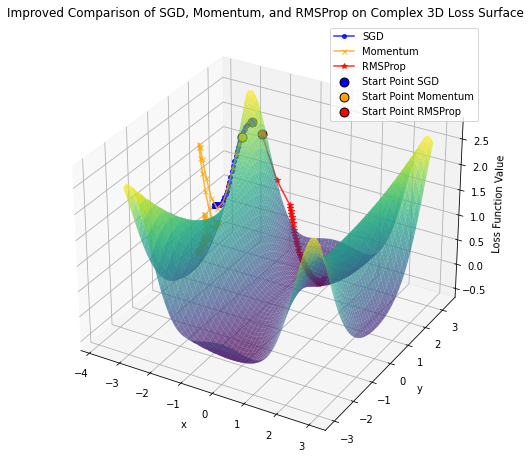

In [55]:
# Offset the starting points slightly for visibility
initial_x_sgd, initial_y_sgd = -2.5, 2.5
initial_x_momentum, initial_y_momentum = -2.7, 2.3
initial_x_rmsprop, initial_y_rmsprop = -2.3, 2.7
# Generate 3D data for the complex loss function
X, Y = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
Z = complex_loss_function(X, Y)

# Run optimization methods with slightly different starting points
sgd_x, sgd_y = sgd(initial_x_sgd, initial_y_sgd, steps=100, lr=0.01)
momentum_x, momentum_y = momentum(initial_x_momentum, initial_y_momentum, steps=100, lr=0.01, beta=0.9)
rmsprop_x, rmsprop_y = rmsprop_complex(initial_x_rmsprop, initial_y_rmsprop, steps=100)

sgd_z = complex_loss_function(sgd_x, sgd_y)
momentum_z = complex_loss_function(momentum_x, momentum_y)
rmsprop_z = complex_loss_function(rmsprop_x, rmsprop_y)

# 3D Plot for comparison with improved visibility
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the complex loss surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Plot paths for SGD, Momentum, and RMSProp with distinct styles
ax.plot(sgd_x, sgd_y, sgd_z, color='blue', marker='o', markersize=4, alpha=0.8, linewidth=1.5, label='SGD')
ax.plot(momentum_x, momentum_y, momentum_z, color='orange', marker='x', markersize=5, alpha=0.8, linewidth=1.5, label='Momentum')
ax.plot(rmsprop_x, rmsprop_y, rmsprop_z, color='red', marker='*', markersize=6, alpha=0.8, linewidth=1.5, label='RMSProp')

# Starting point markers
ax.scatter(initial_x_sgd, initial_y_sgd, complex_loss_function(initial_x_sgd, initial_y_sgd),
           color="blue", s=80, edgecolor="black", label="Start Point SGD")
ax.scatter(initial_x_momentum, initial_y_momentum, complex_loss_function(initial_x_momentum, initial_y_momentum),
           color="orange", s=80, edgecolor="black", label="Start Point Momentum")
ax.scatter(initial_x_rmsprop, initial_y_rmsprop, complex_loss_function(initial_x_rmsprop, initial_y_rmsprop),
           color="red", s=80, edgecolor="black", label="Start Point RMSProp")

# Labels and legend
ax.set_title("Improved Comparison of SGD, Momentum, and RMSProp on Complex 3D Loss Surface")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("Loss Function Value")
ax.legend()

plt.show()



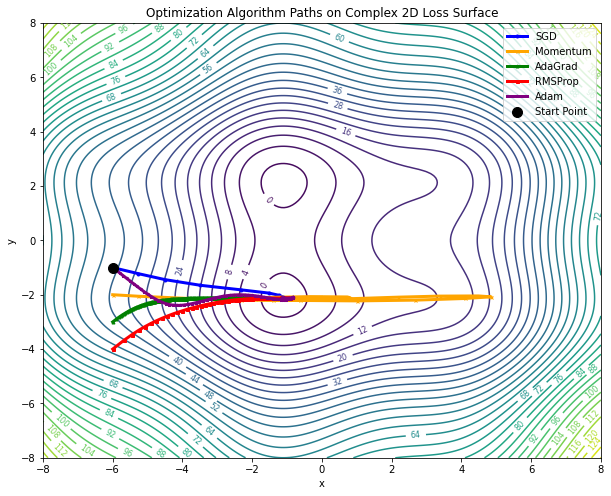

In [56]:
# More Complex Loss Function
def loss_function(x, y):
    return x**2 + y**2 + 5 * np.sin(x) + 5 * np.cos(y)

# Gradients for the complex loss function
def gradients(x, y):
    grad_x = 2 * x + 5 * np.cos(x)
    grad_y = 2 * y - 5 * np.sin(y)
    return grad_x, grad_y

# Remaining code (SGD, Momentum, Adagrad, RMSProp, Adam) remains unchanged.
def sgd(x, y, lr, steps):
    x_history, y_history = [x], [y]
    for _ in range(steps):
        grad_x, grad_y = gradients(x, y)
        x -= lr * grad_x
        y -= lr * grad_y
        x_history.append(x)
        y_history.append(y)
    return x_history, y_history

def momentum(x, y, lr, steps, beta=0.9):
    x_history, y_history = [x], [y]
    v_x, v_y = 0, 0
    for _ in range(steps):
        grad_x, grad_y = gradients(x, y)
        v_x = beta * v_x - lr * grad_x
        v_y = beta * v_y - lr * grad_y
        x += v_x
        y += v_y
        x_history.append(x)
        y_history.append(y)
    return x_history, y_history

def adagrad(x, y, lr, steps, epsilon=1e-8):
    x_history, y_history = [x], [y]
    G_x, G_y = 0, 0
    for _ in range(steps):
        grad_x, grad_y = gradients(x, y)
        G_x += grad_x ** 2
        G_y += grad_y ** 2
        x -= lr / (np.sqrt(G_x) + epsilon) * grad_x
        y -= lr / (np.sqrt(G_y) + epsilon) * grad_y
        x_history.append(x)
        y_history.append(y)
    return x_history, y_history

def rmsprop(x, y, lr, steps, beta=0.9, epsilon=1e-8):
    x_history, y_history = [x], [y]
    S_x, S_y = 0, 0
    for _ in range(steps):
        grad_x, grad_y = gradients(x, y)
        S_x = beta * S_x + (1 - beta) * grad_x ** 2
        S_y = beta * S_y + (1 - beta) * grad_y ** 2
        x -= lr / (np.sqrt(S_x) + epsilon) * grad_x
        y -= lr / (np.sqrt(S_y) + epsilon) * grad_y
        x_history.append(x)
        y_history.append(y)
    return x_history, y_history

def adam(x, y, lr, steps, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x_history, y_history = [x], [y]
    m_x, m_y, v_x, v_y = 0, 0, 0, 0
    for t in range(1, steps + 1):
        grad_x, grad_y = gradients(x, y)
        m_x = beta1 * m_x + (1 - beta1) * grad_x
        m_y = beta1 * m_y + (1 - beta1) * grad_y
        v_x = beta2 * v_x + (1 - beta2) * grad_x ** 2
        v_y = beta2 * v_y + (1 - beta2) * grad_y ** 2
        m_x_hat = m_x / (1 - beta1 ** t)
        m_y_hat = m_y / (1 - beta1 ** t)
        v_x_hat = v_x / (1 - beta2 ** t)
        v_y_hat = v_y / (1 - beta2 ** t)
        x -= lr / (np.sqrt(v_x_hat) + epsilon) * m_x_hat
        y -= lr / (np.sqrt(v_y_hat) + epsilon) * m_y_hat
        x_history.append(x)
        y_history.append(y)
    return x_history, y_history

# Re-run the optimizers
initial_x, initial_y = -6, -1
initial_x1, initial_y1 =-6, -2
initial_x2, initial_y2 = -6, -3
initial_x3, initial_y3 = -6, -4
lr, steps = 0.1, 500

sgd_x, sgd_y = sgd(initial_x, initial_y, lr, steps)
momentum_x, momentum_y = momentum(initial_x1, initial_y1, lr, steps)
adagrad_x, adagrad_y = adagrad(initial_x2, initial_y2, lr, steps)
rmsprop_x, rmsprop_y = rmsprop(initial_x3, initial_y3, lr, steps)
adam_x, adam_y = adam(initial_x, initial_y, lr, steps)

# 2D Visualization
fig, ax = plt.subplots(figsize=(10, 8))

# Contour Plot of the New Loss Function
x = np.linspace(-8, 8, 200)
y = np.linspace(-8, 8, 200)
X, Y = np.meshgrid(x, y)
Z = loss_function(X, Y)

contour = ax.contour(X, Y, Z, levels=40, cmap='viridis')
ax.clabel(contour, inline=True, fontsize=8)

# Optimization Paths
ax.plot(sgd_x, sgd_y, color='blue', label='SGD', linewidth=3, marker='o', markersize=3)
ax.plot(momentum_x, momentum_y, color='orange', label='Momentum', linewidth=3, marker='x', markersize=3)
ax.plot(adagrad_x, adagrad_y, color='green', label='AdaGrad', linewidth=3, marker='^', markersize=3)
ax.plot(rmsprop_x, rmsprop_y, color='red', label='RMSProp', linewidth=3, marker='s', markersize=3)
ax.plot(adam_x, adam_y, color='purple', label='Adam', linewidth=3, marker='*', markersize=3)

# Highlight Start Point
ax.scatter(initial_x, initial_y, color='black', s=100, label='Start Point', zorder=5)

# Labels and Legend
ax.set_title("Optimization Algorithm Paths on Complex 2D Loss Surface")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

plt.show()


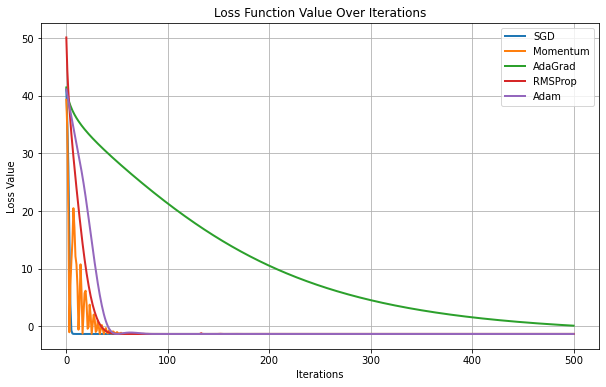

In [57]:
# Modify optimization functions to track loss values
def sgd_with_loss(x, y, lr, steps):
    x_history, y_history, loss_history = [x], [y], [loss_function(x, y)]
    for _ in range(steps):
        grad_x, grad_y = gradients(x, y)
        x -= lr * grad_x
        y -= lr * grad_y
        x_history.append(x)
        y_history.append(y)
        loss_history.append(loss_function(x, y))
    return x_history, y_history, loss_history

def momentum_with_loss(x, y, lr, steps, beta=0.9):
    x_history, y_history, loss_history = [x], [y], [loss_function(x, y)]
    v_x, v_y = 0, 0
    for _ in range(steps):
        grad_x, grad_y = gradients(x, y)
        v_x = beta * v_x - lr * grad_x
        v_y = beta * v_y - lr * grad_y
        x += v_x
        y += v_y
        x_history.append(x)
        y_history.append(y)
        loss_history.append(loss_function(x, y))
    return x_history, y_history, loss_history

def adagrad_with_loss(x, y, lr, steps, epsilon=1e-8):
    x_history, y_history, loss_history = [x], [y], [loss_function(x, y)]
    G_x, G_y = 0, 0
    for _ in range(steps):
        grad_x, grad_y = gradients(x, y)
        G_x += grad_x ** 2
        G_y += grad_y ** 2
        x -= lr / (np.sqrt(G_x) + epsilon) * grad_x
        y -= lr / (np.sqrt(G_y) + epsilon) * grad_y
        x_history.append(x)
        y_history.append(y)
        loss_history.append(loss_function(x, y))
    return x_history, y_history, loss_history

def rmsprop_with_loss(x, y, lr, steps, beta=0.9, epsilon=1e-8):
    x_history, y_history, loss_history = [x], [y], [loss_function(x, y)]
    S_x, S_y = 0, 0
    for _ in range(steps):
        grad_x, grad_y = gradients(x, y)
        S_x = beta * S_x + (1 - beta) * grad_x ** 2
        S_y = beta * S_y + (1 - beta) * grad_y ** 2
        x -= lr / (np.sqrt(S_x) + epsilon) * grad_x
        y -= lr / (np.sqrt(S_y) + epsilon) * grad_y
        x_history.append(x)
        y_history.append(y)
        loss_history.append(loss_function(x, y))
    return x_history, y_history, loss_history

def adam_with_loss(x, y, lr, steps, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x_history, y_history, loss_history = [x], [y], [loss_function(x, y)]
    m_x, m_y, v_x, v_y = 0, 0, 0, 0
    for t in range(1, steps + 1):
        grad_x, grad_y = gradients(x, y)
        m_x = beta1 * m_x + (1 - beta1) * grad_x
        m_y = beta1 * m_y + (1 - beta1) * grad_y
        v_x = beta2 * v_x + (1 - beta2) * grad_x ** 2
        v_y = beta2 * v_y + (1 - beta2) * grad_y ** 2
        m_x_hat = m_x / (1 - beta1 ** t)
        m_y_hat = m_y / (1 - beta1 ** t)
        v_x_hat = v_x / (1 - beta2 ** t)
        v_y_hat = v_y / (1 - beta2 ** t)
        x -= lr / (np.sqrt(v_x_hat) + epsilon) * m_x_hat
        y -= lr / (np.sqrt(v_y_hat) + epsilon) * m_y_hat
        x_history.append(x)
        y_history.append(y)
        loss_history.append(loss_function(x, y))
    return x_history, y_history, loss_history

# Run optimizers with loss tracking
sgd_x, sgd_y, sgd_loss = sgd_with_loss(initial_x, initial_y, lr, steps)
momentum_x, momentum_y, momentum_loss = momentum_with_loss(initial_x1, initial_y1, lr, steps)
adagrad_x, adagrad_y, adagrad_loss = adagrad_with_loss(initial_x2, initial_y2, lr, steps)
rmsprop_x, rmsprop_y, rmsprop_loss = rmsprop_with_loss(initial_x3, initial_y3, lr, steps)
adam_x, adam_y, adam_loss = adam_with_loss(initial_x, initial_y, lr, steps)

# Plot loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(sgd_loss, label="SGD", linewidth=2)
plt.plot(momentum_loss, label="Momentum", linewidth=2)
plt.plot(adagrad_loss, label="AdaGrad", linewidth=2)
plt.plot(rmsprop_loss, label="RMSProp", linewidth=2)
plt.plot(adam_loss, label="Adam", linewidth=2)

plt.title("Loss Function Value Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss Value")
plt.legend()
plt.grid()
plt.show()